# Final Project: Flight Delays and Cancellations

### 1. Introduction to the Dataset

The U.S. Department of Transportation's (DOT) [Buereau of Transportation Statistics](https://www.bts.gov/) tracks the performance of domestic flights operated by large airline carriers. 

In this project we will work with [dataset](https://www.kaggle.com/usdot/flight-delays) compiled by Kaggle providing the summary information on the number of on-time, delayed, canceled, and diverted flights published by DOT's montly Air Travel Consumer [Report](https://www.transportation.gov/airconsumer/air-travel-consumer-reports) and the Kaggle has compiled this dataset for the year of 2015, flight delays and cancellations. 

#### 1.1 Acknowledgements
[Kaggle](https://www.kaggle.com) and DOT's Bureau of Transportation Statistics. 

### 2. Dataset and [Data Dictionary](https://www.kaggle.com/usdot/flight-delays/data)

The raw dataset is included as three files: airlines.csv, airports.csv, flights_20_perc.csv in the data folder. Use the [link](https://www.kaggle.com/usdot/flight-delays/data) to get an understanding of the column metadata for each of the files used in the data. 

Also, note that the file (flights_20_perc.csv) only contains 20% random sample of the oringal data available on Kaggle. It still has information of 1M flights. This reduction was done to facilitate new programmers working with data files with manageable sizes. 


### 3. Project Details
Flight delays and cancellations are typical problems all of us face when traveling. The airports and airline industry try to do everything they can to minimize the impact on the customers and improve their experience. On the other the airline industry also optimizes the flights effectively to fly through their network of cities. That is, for example, a flight from Seattle flies to Chicago, and then further is scheduled to fly from Chicago to New York City. As a result of this efficient utilization of the flights, a popular belief among travelers is that **the flight delays (and cancellations) happen as the day progresses**. Though it seems intuitive, we as data scientists will always look at data to confirm our intuitions. Remember, *"In God we trust; all others bring data. -Unknown"* 

#### 3.1 Main Goals
Use the data to prove or disprove the following claims. Your analysis should be accompanied by visualizations where appropriate. Not every answer needs a visualization; it is up to you to decide where a visualization is needed or appropriate.

1. Do flight delays happen more often later in the day compared to earlier in the day? (15 points)
2. Does the response to Claim 1 depend on the month of the year? (10 points)
3. Does the response to Claim 1 depend on the airline? Which airlines have this phenomenon more pronounced and less pronounced? (10 points)
4. Do flight cancellation happen more often later in the day than earlier in the day? (15 points)
5. Does the response to Claim 4 depend on the month of the year? (10 points)
6. Does the response to Claim 4 depend on the airline? (10 points)
7. State based analysis: What are the top three states with lowest average flight delay? What are the top three states with highest average flight delay? Come up with qualitative (and/or quantitative) reason for why you think these states are lowest and highest flight delays. (15 points)
8. Taxi time in the flight is most frustrating experience to me. Can you let me know which airports I should avoid and which ones I should prefer? Answer this based on average taxi time (both taxi in and taxi out)? (15 points)

#### Hint:

Some of the questions above require understanding of Group By in Pandas. For example, group by hour of the day or month or airline, etc, and aggregating various informations that will support your arguments.  

#### 3.2 Important Notes
1. I do not know if any of the above phenomenon are true in the data I provided. So, do not only attempt to prove them, you could disprove them as well. There is no one right answer. Your responses are graded based on the strength of the arguments and validity of your analysis to prove your points with the data.
2. For each claim, please start with the description in a Markdown cell. Then write Python code to analyze the data and prove/disprove the claim. After the code, please write a short paragraph in a Makdown cell to explain your analysis.
3. The data (flights_20_perc.csv) is still a **large data file**. You will have to learn (which operations create a copy of the DataFrame, which operations just manipulate existing DataFrame) to work with the large amount of data without requiring too much memory. 
    * Most importantly, learn how to use the keyword argument `inplace=True`. In this way you are modifying the existing `DataFrame` rather than create a copy. 
 

#### 3.3 Bonus: An open ended exploration (20 points)

We investigated above if there is a pattern that the delays in the flights happen more often as the day progresses. **Explore and find more interesting patterns (not necessarily based on delays or cancellations) from the data.** This bonus question is only to pick your analytical and creative mind. Further, it should also give you an experience of a side project. Though, this data (airlines.csv, flights_20_perc.csv, airports.csv) is your primary data, you may chose to combine other supplementary datasets for your analysis. 

I recommend to work on this bonus part only after finishing the required analysis above and do not spend too much time on this bonus question. 

Only submissions with the most interesting findings will get this additional bonus points. Judgement will be made on correctness, innovativeness/creativeness, strength of the argument, and the rigor in the data analysis. The bonus points will be added to your project score.

### 4. Submission Expectations and Requirements

#### 4.1 Project report: 

Please combine your data analysis (Python code) and results explanation (Markdown) in one Jupyter notebook. That is your final project report. Make sure your python code and explanation narrative are clearly differentiated in seperate code and markdown cells. You can start your report after the "STARTER CODE" cell.

#### 4.2 Submission and Due Date
You will submit your final project report via the Submit button on Vocareum. You can do multiple submissions, however, note that only the last submission will be graded. All of this is exactly as in the assignments you did throughout the course.

The project is due on ** Monday, Nov 23rd at 11:59PM Eastern**. There will be no exceptions i.e. no late submissions will be accepted.


# Final Project - Team 3 (3 PM Session)
### Prepared by: Luke Apuzzi, James Hulbert, Sebastian Schneider, Hexuan Zhang, Charlie Zhou

In [27]:
## Starter code

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap #this package need to be installed

# Loading from the public data folder on the Vocareum cloud (../resource/asnlib/publicdata/). 
# The following statements should get the three data files loaded as DataFrames. 

airlines = pd.read_csv("../data/airlines.csv")
airports = pd.read_csv("../data/airports.csv")
flights  = pd.read_csv("../data/flights_20_perc.csv")

### Question 1 
**Do flight delays happen more often later in the day compared to earlier in the day?**

### Description

We assume that there will be more flights during later flights compared to earlier ones. As the day progresses delays can affect connecting flights down the line at other destinations leading to a sort of domino effect. We also think that due to the closing of airports over night to minimize noise pollution for citizens there is a larger quantity of lights in the afternoon compared to earlier in the day.

#### Code

In [28]:
flights['Delayed'] = flights['DEPARTURE_DELAY'] > 0

early_flights_mask = (flights['SCHEDULED_DEPARTURE'] < 1200)
late_flights_mask = (flights['SCHEDULED_DEPARTURE'] >= 1200)

early_flights = flights[early_flights_mask]
late_flights = flights[late_flights_mask]

early_flights_delayed = early_flights[early_flights['DEPARTURE_DELAY']>0]
late_flights_delayed = late_flights[late_flights['DEPARTURE_DELAY']>0]

early_flights_delayed_count = early_flights_delayed['DEPARTURE_DELAY'].count()
late_flights_delayed_count = late_flights_delayed['DEPARTURE_DELAY'].count()

print(early_flights_delayed_count)
print(late_flights_delayed_count)

print(early_flights_delayed_count/len(early_flights)*100)
print(late_flights_delayed_count/len(late_flights)*100)

128457
296889
26.67396206668854
43.51724410868428


In [29]:
d = {'Count': [int(early_flights_count), int(late_flights_count)]}
plot_df1 = pd.DataFrame(data=d)

plot_df1.rename({0:'Early',1:'Late'},inplace=True)

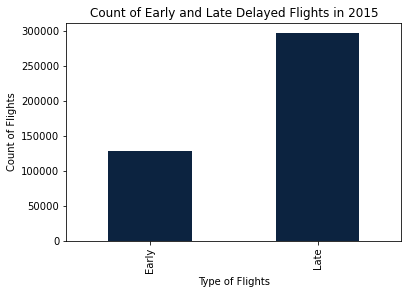

In [30]:
figure, sebastian = plt.subplots()
plot_df1.plot.bar(ax = sebastian, color = '#0c2340')
sebastian.set_title("Count of Early and Late Delayed Flights in 2015")
sebastian.set_xlabel("Type of Flights")
sebastian.set_ylabel("Count of Flights")
sebastian.get_legend().remove()

#### Interpretation
From the output above we can see that just looking at the numbers there are a lot more delays in the flights after 12 pm compared to flights before noon. We did notice however that there is a larger number of flights in the afternoon and therefore calculated the percentage of delayed flights based upon them before or after 12 pm. We are able to see the same trend as 26.67% of early flights and 43.52% of late flights are delayed.

### Question 2
**Does the response to Claim 1 depend on the month of the year?**

### Description

Based upon question 1 findings we assume that there is a difference of number of flights being delayed based upon month. One of the logistical hurdles airports have to overcome are changes in the weather and seasons. Therefore, it is reasonable to assume that the winter months will pose a bigger challenge for airports and airlines to stick to their schedule.

#### Code

Text(0, 0.5, 'Number of Delays')

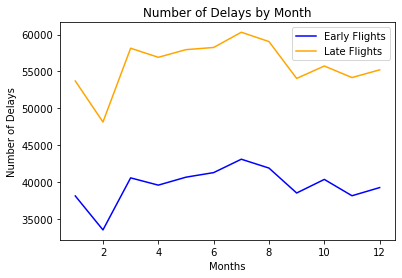

In [31]:
early_flights_month = early_flights.groupby(['MONTH'])
late_flights_month = late_flights.groupby(['MONTH'])

early_flights_group = early_flights_month['DEPARTURE_DELAY'].count()
late_flights_group = late_flights_month['DEPARTURE_DELAY'].count()

early_flights_delayed_perc = early_flights_month['Delayed'].mean()
late_flights_delayed_perc = late_flights_month['Delayed'].mean()

#Plot
figure,axes = plt.subplots()

axes.plot(early_flights_group.index, early_flights_group, label = 'Early Flights', color = 'Blue')
axes.plot(late_flights_group.index, late_flights_group, label = 'Late Flights', color = 'Orange')
axes.legend()
axes.set_title("Number of Delays by Month")
axes.set_xlabel("Months")
axes.set_ylabel("Number of Delays")

Text(0, 0.5, 'Percentage')

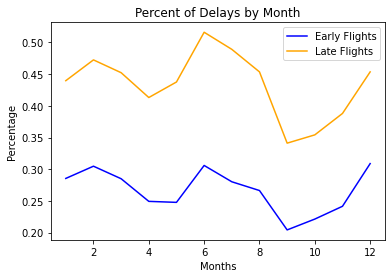

In [32]:
#Plot
figure,axes = plt.subplots()

axes.plot(early_flights_delayed_perc.index, early_flights_delayed_perc, label = 'Early Flights', color = 'Blue')
axes.plot(late_flights_delayed_perc.index, late_flights_delayed_perc, label = 'Late Flights', color = 'Orange')
axes.legend()
axes.set_title("Percent of Delays by Month")
axes.set_xlabel("Months")
axes.set_ylabel("Percentage")

#### Interpretation
The visualization shows us that there is a spike in cancelations for both early and late flights during the summer month, specifically June and July. The following months there is a decline in this trend with flights being most punctual during September. Afterwards we are seeing an increase in delays again which can be due to the harsher weather during the winter months and planes requiring special treatment like de-icing before takeoff. This pattern can be seen in both, the raw number count and the percentage. Another interesting observation is that while the absolute amount of delays in Febuary was decreasing, the precent of flight delays is increasing. We believe this is due to the shorter length of month in Febuary and more delays causde by the extreme cold weather. 

### Question 3
**Does the response to Claim 1 depend on the airline?** 
**Which airlines have this phenomenon more pronounced and less pronounced?**

### Description

As we are getting more familiar with the data it is safe to assume that there will be a difference in how airlines handle delays. We think that smaller airlines that fly regional routes, especially to more remote airports will have less delays as there are less factors such as traffic and airport logistics to influence their timely departure.

#### Code

Text(0, 0.5, 'Count of Flights')

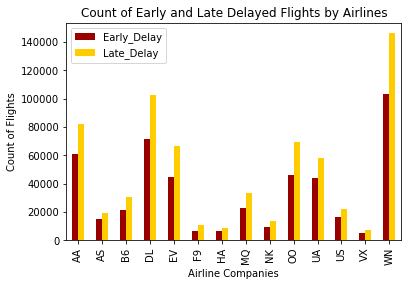

In [33]:
early_flights_airline = early_flights.rename({'DEPARTURE_DELAY':"Early_Delay"}, axis=1).groupby(['AIRLINE'])
late_flights_airline = late_flights.rename({'DEPARTURE_DELAY':"Late_Delay"}, axis=1).groupby(['AIRLINE'])

early_flights_group_airline = early_flights_airline['Early_Delay'].count()
late_flights_group_airline = late_flights_airline['Late_Delay'].count()

plot_df2 = pd.concat([early_flights_group_airline, late_flights_group_airline], axis=1)
plot_df2 = plot_df2[['Early_Delay', 'Late_Delay']]



#Plot
figure, sebastian = plt.subplots()
plot_df2.plot.bar(ax = sebastian, color = ['#990000', '#FFCC00'])
sebastian.set_title("Count of Early and Late Delayed Flights by Airlines")
sebastian.set_xlabel("Airline Companies")
sebastian.set_ylabel("Count of Flights")

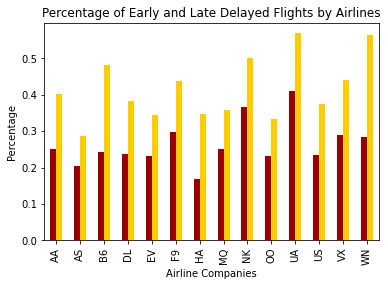

In [34]:
early_flights_group_avg = early_flights_airline['Delayed'].mean()
late_flights_group_avg = late_flights_airline['Delayed'].mean()

early_flights_group_avg.rename({'Delayed':'E_Delayed'},inplace = True)
late_flights_group_avg.rename({'Delayed':'L_Delayed'},inplace = True)

plot_df3 = pd.concat([early_flights_group_avg, late_flights_group_avg], axis=1)
plot_df3

#Plot
figure, sebastian = plt.subplots()

plot_df3.plot.bar(ax = sebastian, color = ['#990000', '#FFCC00'])
sebastian.set_title("Percentage of Early and Late Delayed Flights by Airlines")
sebastian.set_xlabel("Airline Companies")
sebastian.set_ylabel("Percentage")
sebastian.get_legend().remove()

#### Interpretation
Based on the bar charts above we can again see the clear trend of late flights getting delayed more often than early flights. While it is difficult to see a difference between airlines based upon pure numbers, there are clear outliers when looking at the percentages. Just by comparing the bar size we can see that JetBlue, Hawaiian Air and SouthWest have lower rates of flights being delayed than all other competitors. Many factors are at play here including better business operations and market segmentation. All three providers heavily service regional flight demands with very few connections going abroad. This specialization allows for better prediction of flight times, weather and airport taxi times all of which allows for more accurate business flows and process streamlining. Additionally, SouthWest and Hawaiian Air heavily service the west coast, Mexico and parts of Asia making the weather rarely a factor of delay.

### Question 4
**Do flight cancellation happen more often later in the day than earlier in the day?**


### Description

The approach to this question would similar to the previous question except this question will be focusing on the cancellation column of the data set. The column will be much easier to handle since it is a binary variable contains only 1 and 0. This binary variable will help us calculate both the absolute number of cancellation and the rate of cancellation for early flights and late flights. 

The definition of early and late flights will be as same as previous questions that flights take off before noon will be classified as early a flight. Otherwise it will be classified as a later flight. Since we have already known that the number of early and late flights are different, it will make sense if compare the cancellation rate of early and late flights. 

#### Code

In [35]:
flights.drop(['AIR_SYSTEM_DELAY',
              'SECURITY_DELAY',
              'AIRLINE_DELAY',
              'LATE_AIRCRAFT_DELAY',
              'WEATHER_DELAY',
             'TAIL_NUMBER',
             'CANCELLATION_REASON'],axis = 1, inplace = True)

In [36]:
extended_flights = pd.merge(flights,
                           airlines,
                           left_on = 'AIRLINE',
                           right_on = 'IATA_CODE')
extended_flights.rename(columns = {'AIRLINE_y': 'AIRLINE'}, inplace = True)
extended_flights.drop('AIRLINE_x',axis = 1,inplace = True)

In [37]:
extended_flights['CANCELLED'].unique()

array([0, 1], dtype=int64)

In [38]:
#Do flight cancellation happen more often later in the day than earlier in the day?
early_flights = extended_flights[extended_flights['SCHEDULED_DEPARTURE'] < 1200]
late_flights = extended_flights[extended_flights['SCHEDULED_DEPARTURE'] >= 1200]

early_cancellation_rate = early_flights['CANCELLED'].sum()/len(early_flights)
late_cancellation_rate = late_flights['CANCELLED'].sum()/len(late_flights)

print(early_cancellation_rate*100)
print(late_cancellation_rate*100)
print((early_cancellation_rate - late_cancellation_rate)*100)

# While the cancellation for both earlier and later flights are not signifiant different from each other, later flights tends to get canclled
# easier compare to early flights by 0.2%
# However, the rate does not reflect the absolute value that how much flights got cancelled in the data set. 

early_cancellation_flights_number = early_flights['CANCELLED'].sum()
late_cancellation_flights_number = late_flights['CANCELLED'].sum()

print('There are {} flights cancelled for early flights, and {} flights cancelled for later flights.'.format(early_cancellation_flights_number,late_cancellation_flights_number))
# After double checking, what I was worrying did not happen. 

1.4095211199754143
1.6190949426369
-0.2095738226614855
There are 6788 flights cancelled for early flights, and 11046 flights cancelled for later flights.


#### Interpretation
There are 6788 flights cancelled before 12pm, and 11046 flights cancelled after 12pm. This equates to 1.4% cancelation rate during early flights and 1.6% cancelation rate during late flights. We can conclude there is only a marginal difference in cancelation rate between early and late flights.

### Question 5
**Does the response to Claim 4 depend on the month of the year? **

### Description

Flights tend to be cancelled when encountering extreme weather condition. Therefore, it would make sense that the cancellation rate dffer by month. In addition, we would expect summer and winter cancellation rate would be higher since heavy rains and snow storms tend to take place among these two seasons. 

#### Code

In [39]:
#Does the response to Claim 4 depend on the month of the year?
flights_by_month = extended_flights.groupby(['MONTH'])
num_flights_by_month = flights_by_month['CANCELLED'].count()
cancelled_rate_by_month = flights_by_month['CANCELLED'].mean()
cancelled_rate_by_month

MONTH
1     0.025565
2     0.047870
3     0.021626
4     0.009225
5     0.011654
6     0.017377
7     0.009441
8     0.009241
9     0.004539
10    0.004961
11    0.009788
12    0.016534
Name: CANCELLED, dtype: float64

Text(0, 0.5, 'Cancellation Rate')

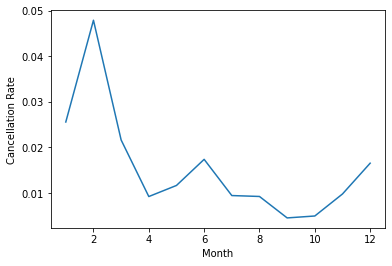

In [40]:
figure, axes = plt.subplots()

axes.plot(cancelled_rate_by_month.index, cancelled_rate_by_month)
axes.set_xlabel('Month')
axes.set_ylabel('Cancellation Rate')

#### Interpretation
As outlined by the plot above, the cancellation rate differs by month. Looking at the visualization, we can see that the peak rate of cancellations is in the winter months. However, this plot only gives us the overall view of cancelation rates based upon single months. We need to do additional work to be able to identify how early flights and late flights perform differently throughout the year.

In [41]:
early_flights_month = early_flights.groupby(['MONTH'])
cancelled_rate_by_month_early = early_flights_month['CANCELLED'].mean()

late_flights_month = late_flights.groupby(['MONTH'])
cancelled_rate_by_month_late = late_flights_month['CANCELLED'].mean()

Text(0.5, 1.0, 'Cancellation Rate by Departure Time')

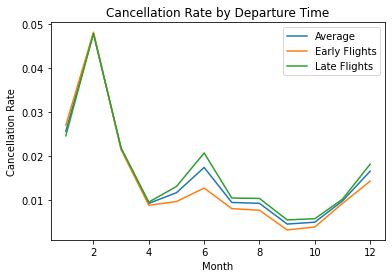

In [42]:
figure, axes = plt.subplots()

axes.plot(cancelled_rate_by_month.index, cancelled_rate_by_month, label = 'Average')
axes.plot(cancelled_rate_by_month_early.index, cancelled_rate_by_month_early, label = 'Early Flights')
axes.plot(cancelled_rate_by_month_late.index, cancelled_rate_by_month_late, label = 'Late Flights')
axes.legend()
axes.set_xlabel('Month')
axes.set_ylabel('Cancellation Rate')
axes.set_title('Cancellation Rate by Departure Time')

#### Interpretation
By plotting the average cancelation rate by month in additional to the rates of early and late flights we can get some interesting insights. Before April, the cancellation rate is almost identical between early flights and late flights (except a gap in January). Moving into summer, the cancellation rate is always higher for late flights compare to early flights. The gap between these two types of flights is the greatest in June. We can conclude that a flight's cancellation probability varies by month peaking in February and late flights tend to have more cancelled flights during summer.

### Question 6
**Does the response to Claim 4 depend on the airline?**

### Description

In terms of the absolute number of flight cancelled, apparently smaller airline companies would have less cancellation compare to larger ones due to the big difference of volume of operation. However, that probably does not indicate the possibiity of cancellation would be smaller as well among small airline companies. While they operates less flights, they are more fragile when encountering extreme conditions and have less resources to overcome obstacles. 

#### Code

In [43]:
# Does the response to Claim 4 depend on the airline?
# Step 1: Overall view of flight cancellation cases by airline (visualized by bar chart)
flights_by_airline = extended_flights.groupby(['IATA_CODE']).sum()
airline_num_cancelled = flights_by_airline['CANCELLED']
airline_num_cancelled

IATA_CODE
AA    2165
AS     129
B6     867
DL     741
EV    2987
F9     112
HA      30
MQ    2978
NK     415
OO    2038
UA    1284
US     804
VX     109
WN    3175
Name: CANCELLED, dtype: int64

Text(0.5, 1.0, 'The Distribution of Cancelled Flights Across Airlines')

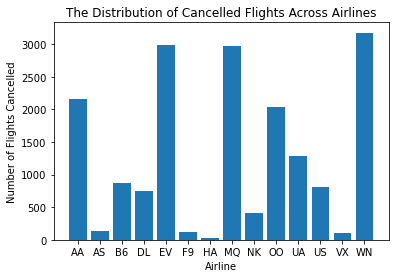

In [44]:
figure, axes = plt.subplots()

axes.bar(range(len(airline_num_cancelled.index)),airline_num_cancelled)
axes.set_xticks(range(len(airline_num_cancelled.index)))
axes.set_xticklabels(airline_num_cancelled.index)
axes.set_xlabel("Airline")
axes.set_ylabel("Number of Flights Cancelled")
axes.set_title("The Distribution of Cancelled Flights Across Airlines")

According to the graph, there are several arilines stands out in terms of the most cancelled flights. It is easy to identify these ones with high number of cancelled flights:
    1. WN - Southwest
    2. MQ - Envoy Air (Parent: AA)
    3. EV - Express Jet (Parent: United)
    4. AA - American Airlines
Again, this is merely an overview by airlines and we have yet take a look how each airline does earlier in a day and later in a day. 

In [45]:
# Step 2: Deeper view into early flights and later flights
early_flights_airlines = early_flights.groupby(['IATA_CODE'])
early_flights_airlines_cancelled = early_flights_airlines['CANCELLED'].sum()

late_flights_airlines = late_flights.groupby(['IATA_CODE'])
late_flights_airlines_cancelled = late_flights_airlines['CANCELLED'].sum()

plot_bar_df1 = pd.DataFrame({"Early_Cancelled":early_flights_airlines_cancelled,
                           "Late_Cancelled":late_flights_airlines_cancelled})

Text(0.5, 0, 'Airline Companies')

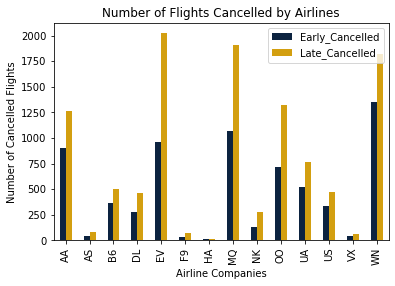

In [46]:
figure, charlie = plt.subplots()

plot_bar_df1.plot.bar(ax = charlie, color = ["#0c2340","#d39F10"])
charlie.set_ylabel("Number of Cancelled Flights")
charlie.set_title("Number of Flights Cancelled by Airlines")
charlie.set_xlabel("Airline Companies")

Text(0.5, 0, 'Airline Companies')

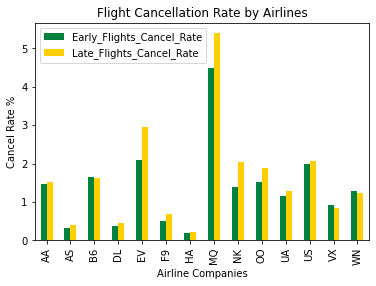

In [47]:
early_flights_airlines_cancelled_rate = (early_flights_airlines_cancelled/(early_flights.groupby(['IATA_CODE'])['CANCELLED'].count()))*100
late_flights_airlines_cancelled_rate = (late_flights_airlines_cancelled/(late_flights.groupby(['IATA_CODE'])['CANCELLED'].count()))*100

plot_bar_df2 = pd.DataFrame({"Early_Flights_Cancel_Rate":early_flights_airlines_cancelled_rate,
                            "Late_Flights_Cancel_Rate":late_flights_airlines_cancelled_rate})

figure, charlie = plt.subplots()

plot_bar_df2.plot.bar(ax = charlie, color = ["#00823E","#ffcf01"])
charlie.set_ylabel("Cancel Rate %")
charlie.set_title("Flight Cancellation Rate by Airlines")
charlie.set_xlabel("Airline Companies")

#### Interpretation
Our findings are consistent with the previous section, with late flights being more likely to be cancelled compare to early flights. Such comparison is especially obvious with Express Jet (EV). The airline has the most cancelled flights among late flights. On the other hand, Southwest Airlines have the most cancellations of early flights among all airlines.
However, since the capacity of each airline is different, it makes more sense to look at the percentage of cancellation rather than the absolute numbers of cancellations for each airline.
The second graph shoes the cancelation rate and while some of the findings of the previous graph stay consistent (Hawaiian, Alaska & Frontier have the lowest cancelation rate) we do see a few changes. Delta has a surprisingly low cancelation rate, while SouthWest also redeems itself in terms of reliability.

In conclusion the number of flights cancelled varies depending on the airline company. To avoid cancelations or minimize the chance of it happening to you looking at flights operated through Alaska, Frontier, or Hawaiian Airlines is the safest bet.

### Question 7
**What are the top three states with lowest average flight delay? What are the top three states with highest average flight delay? Come up with qualitative (and/or quantitative) reason for why you think these states are lowest and highest flight delays.**

### Description

There are many factors causing delays so it is more difficult to pinpoint states that might have higher delays; however one can make an educated guess. One factor is the size of the airport and the corresponding flight traffic. Both as they increase should also increase the number of delays an airport/ state has. Another factor is the weather. Winter is a tough season for airports as they have to battle the elements to keep flights on time. States with particularly harsh winters will have a higher chance of delaying flights more often in these months. Finally, the type of airline that mainly services that route can have an influence with certain airlines doing a better job at maintaining a tight schedule at certain locations than others.

#### Code

In [48]:
# Merge flights and airport data
flights_merged = pd.merge(flights, airports, left_on="ORIGIN_AIRPORT", right_on="IATA_CODE")
flights_merged.rename({"LATITUDE":"ORIGIN_LAT","LONGITUDE":"ORIGIN_LON","STATE":"ORIGIN_STATE"},axis=1,inplace=True)
flights_merged.drop(["IATA_CODE",
                    "AIRPORT",
                    "CITY",
                    "COUNTRY"], axis=1,inplace = True)
flights_merged = pd.merge(flights_merged,airports,left_on="DESTINATION_AIRPORT",right_on="IATA_CODE")
flights_merged.rename({"LATITUDE":"DEST_LAT","LONGITUDE":"DEST_LON","STATE":"DEST_STATE"},axis=1,inplace=True)
flights_merged.drop(['TAXI_OUT',
                    'WHEELS_OFF',
                    'SCHEDULED_TIME',
                    'ELAPSED_TIME',
                    'AIR_TIME',
                    'DISTANCE',
                    'WHEELS_ON',
                    'TAXI_IN',                    
                    'DIVERTED',
                    'COUNTRY',
                    'Delayed'],axis = 1,inplace=True)

In [49]:
flights_merged_delays = flights_merged[(flights_merged['DEPARTURE_DELAY']>0) | (flights_merged['ARRIVAL_DELAY']>0)]

avg_delayed_departure = flights_merged_delays.groupby(['ORIGIN_STATE']).mean()['DEPARTURE_DELAY']
avg_delayed_arrival = flights_merged_delays.groupby(['DEST_STATE']).mean()['ARRIVAL_DELAY']

In [50]:
flights_merged_delays[flights_merged_delays['ORIGIN_STATE']=="DE"]["DEPARTURE_DELAY"]

688474    109.0
688475     23.0
688476     36.0
688477      4.0
688478    148.0
688480    228.0
688481     59.0
688484      1.0
874894     -2.0
874895     67.0
874896     19.0
874897      0.0
Name: DEPARTURE_DELAY, dtype: float64

In [51]:
flights_merged_delays[flights_merged_delays['ORIGIN_STATE']=="VT"]["DEPARTURE_DELAY"]

347575    -7.0
347576    -5.0
347578     1.0
347579    -4.0
347580    10.0
          ... 
536171     4.0
902827     2.0
902829    62.0
902830    60.0
902832    30.0
Name: DEPARTURE_DELAY, Length: 251, dtype: float64

In [52]:
flights_merged_delays[flights_merged_delays['DEST_STATE']=="AS"]["ARRIVAL_DELAY"]

1059678     -4.0
1059680      0.0
1059681     -8.0
1059684     -3.0
1059687      3.0
1059688    180.0
1059690     -9.0
1059692     -7.0
1059693     24.0
1059695      0.0
Name: ARRIVAL_DELAY, dtype: float64

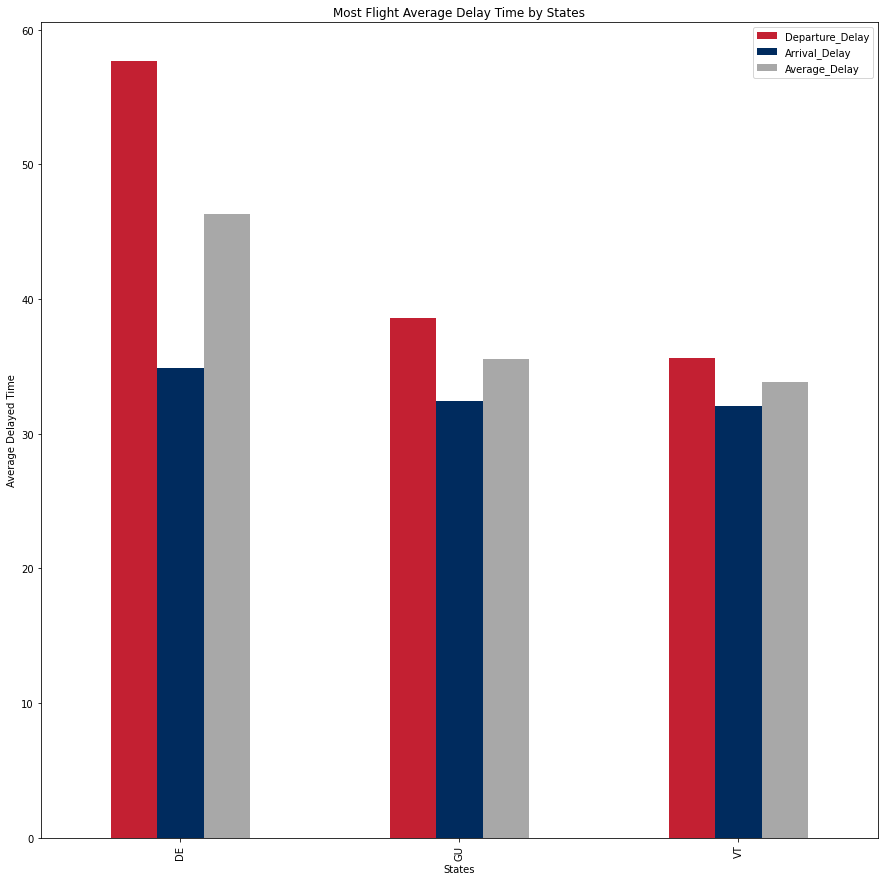

In [53]:
# Plot the delay distributions
plot_bar_df3 = pd.DataFrame({"Departure_Delay":avg_delayed_departure,
                            "Arrival_Delay":avg_delayed_arrival})

plot_bar_df3['Average_Delay'] = (plot_bar_df3['Departure_Delay']+plot_bar_df3['Arrival_Delay'])/2
plot_bar_df3.sort_values(ascending=False,inplace=True,by=['Average_Delay'])

plot_bar_df3 = plot_bar_df3[0:3]

figure, james = plt.subplots()

plot_bar_df3.plot.bar(ax = james, color = ["#C32032","#002B5E","#A8A8A8"])
james.set_ylabel("Average Delayed Time")
james.set_title("Most Flight Average Delay Time by States")
james.set_xlabel("States")
figure.set_size_inches(15,15)

# The bar chart isn't really working... try horizontal chart

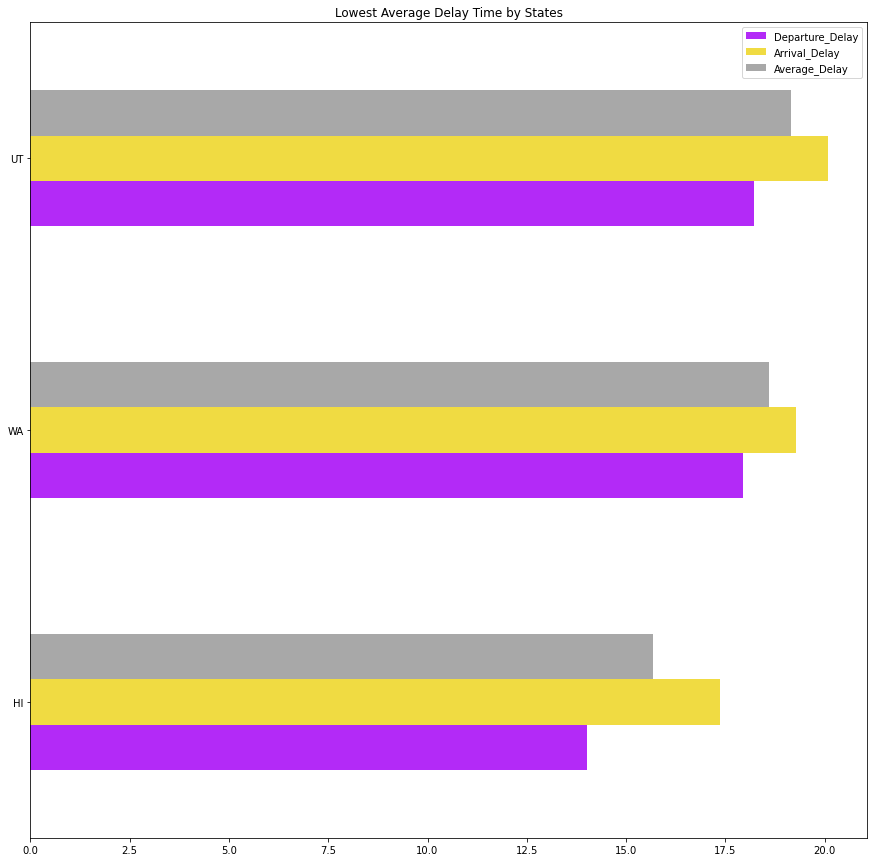

In [54]:
# Plot the horizontal bar chart
plot_bar_df3 = pd.DataFrame({"Departure_Delay":avg_delayed_departure,
                            "Arrival_Delay":avg_delayed_arrival})

plot_bar_df3['Average_Delay'] = (plot_bar_df3['Departure_Delay']+plot_bar_df3['Arrival_Delay'])/2
plot_bar_df3.sort_values(ascending=True,inplace=True,by=['Average_Delay'])

plot_bar_df3 = plot_bar_df3[0:3]

figure, luke = plt.subplots()

plot_bar_df3.plot.barh(ax=luke, color=['#B32AF7','#F0DB42','#A8A8A8'])
luke.set_title("Lowest Average Delay Time by States")
figure.set_size_inches(15,15)

#### Interpretation
Looking at the first graph we plotted the departure, arrival and total delay and filtered by the top 3 states in this category. We found that especially small states such as American Samoa, Delaware and Vermont with less air traffic and smaller airports suffer heavily from delays. Some further research also showed that Delaware for example does not have regular air service but rather is only operated by frontier occasionally. Most people traveling to Delaware rather fly into one of the big surrounding airports and then drive to their final destination. This low number of flights together with a high number of delays skewed out output towards smaller states. Another interesting finding is that when a flight is delayed in one of the smaller airports it tends to be delayed for a long time. This could be due to the lack of infrastructure to fix a plan at smaller regional airports. Waiting for spare parts or even a replacement aircraft can take a very long time at these destinations.

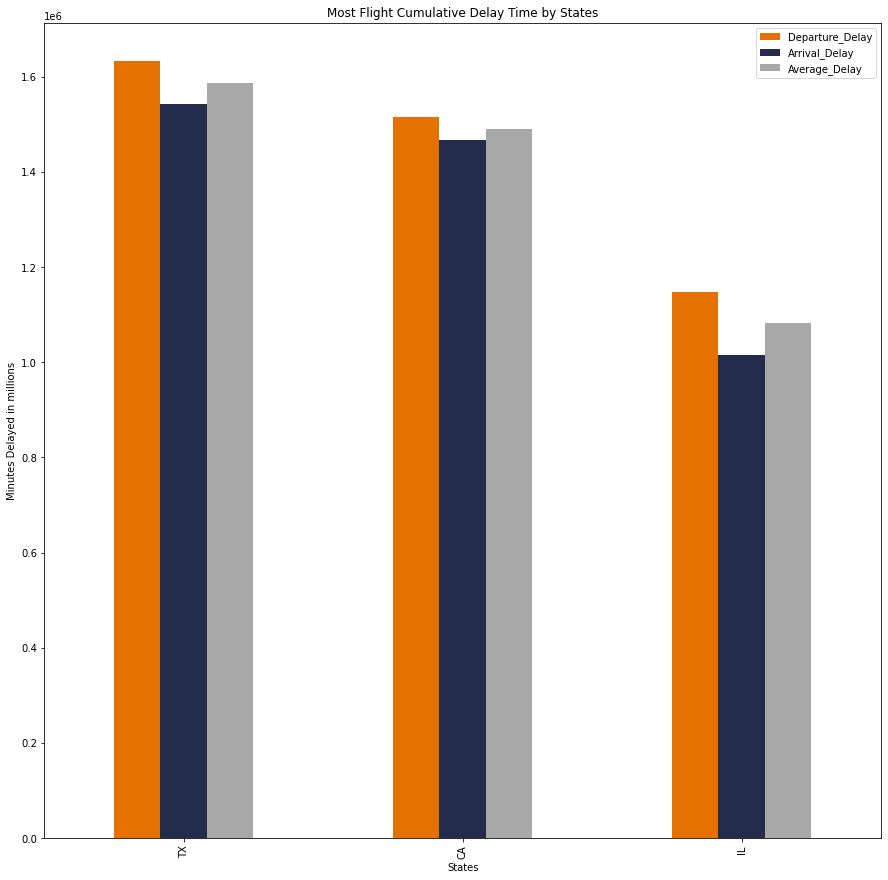

In [55]:
# The result is counter intuitive that the average delay time is shorter in some major states compare to smaller states... 
# Probably try the accumuative delay time
sum_delayed_departure = flights_merged_delays.groupby(['ORIGIN_STATE']).sum()['DEPARTURE_DELAY']
sum_delayed_arrival = flights_merged_delays.groupby(['DEST_STATE']).sum()['ARRIVAL_DELAY']

plot_bar_df4 = pd.DataFrame({"Departure_Delay":sum_delayed_departure,
                            "Arrival_Delay":sum_delayed_arrival})

plot_bar_df4['Average_Delay'] = (plot_bar_df4['Departure_Delay']+plot_bar_df4['Arrival_Delay'])/2
plot_bar_df4.sort_values(ascending=False,inplace=True,by=['Average_Delay'])
plot_bar_df4 = plot_bar_df4[0:3]

figure, hexuan = plt.subplots()

plot_bar_df4.plot.bar(ax = hexuan, color = ["#E57200","#232D4B","#A8A8A8"])
hexuan.set_ylabel("Minutes Delayed in millions")
hexuan.set_title("Most Flight Cumulative Delay Time by States")
hexuan.set_xlabel("States")
figure.set_size_inches(15,15)

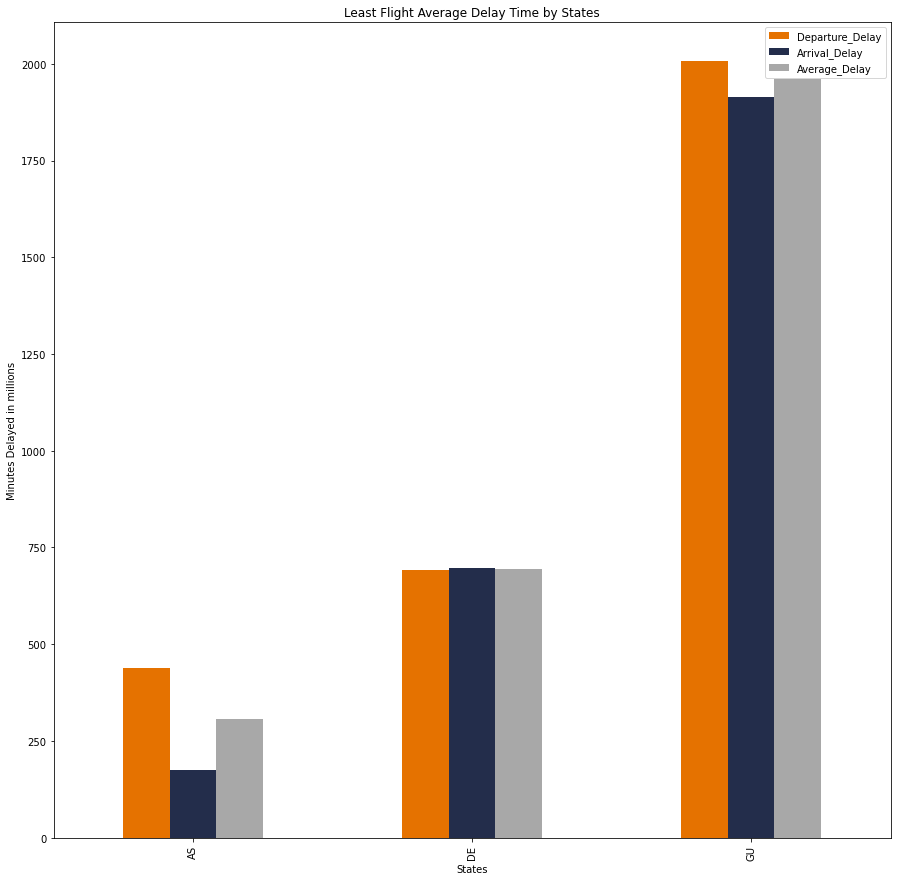

In [56]:
plot_bar_df4 = pd.DataFrame({"Departure_Delay":sum_delayed_departure,
                            "Arrival_Delay":sum_delayed_arrival})

plot_bar_df4['Average_Delay'] = (plot_bar_df4['Departure_Delay']+plot_bar_df4['Arrival_Delay'])/2
plot_bar_df4.sort_values(ascending=True,inplace=True,by=['Average_Delay'])
plot_bar_df4 = plot_bar_df4[0:3]

figure, hexuan = plt.subplots()

plot_bar_df4.plot.bar(ax = hexuan, color = ["#E57200","#232D4B","#A8A8A8"])
hexuan.set_ylabel("Minutes Delayed in millions")
hexuan.set_title("Least Flight Average Delay Time by States")
hexuan.set_xlabel("States")
figure.set_size_inches(15,15)

#### Interpretation
We also checked total amount of time delayed per state to avoid the bias of small states with low air traffic. Unfortunately, we almost see the effect swing to the other extreme with the biggest states with the most air traffic (California, Texas and Illinois) having the highest amount of total delay time. It would be interesting to see the average delay of these large airports to see if one is better off flying out of a large airport with a higher chance of a small delay or taking the risk of flying out of a small airport with a smaller chance delay but higher amount of delay time.

In [57]:
flights_merged['DEPARTURE_DELAYED'] = flights_merged['DEPARTURE_DELAY'] > 0
flights_merged['ARRIVAL_DELAYED'] = flights_merged['ARRIVAL_DELAY'] > 0

In [58]:
avg_num_departure_delayed_state = flights_merged.groupby(['ORIGIN_STATE']).mean()['DEPARTURE_DELAYED']*100
avg_num_arrival_delayed_state = flights_merged.groupby(['DEST_STATE']).mean()['ARRIVAL_DELAYED']*100

In [59]:
flights_merged.groupby(['ORIGIN_STATE']).count()['DEPARTURE_DELAYED']

ORIGIN_STATE
AK      6762
AL      5339
AR      4497
AS        21
AZ     33018
CA    129561
CO     43084
CT      3817
DE        15
FL     83575
GA     71855
GU        79
HI     18214
IA      3473
ID      3314
IL     76419
IN      7912
KS      2168
KY      7425
LA     13146
MA     21937
MD     17076
ME      1056
MI     27254
MN     23826
MO     18615
MS      2693
MT      3016
NC     29390
ND      3399
NE      3987
NH      1249
NJ     21621
NM      4630
NV     29246
NY     49043
OH     14947
OK      6437
OR     11257
PA     20011
PR      5356
RI      2178
SC      5742
SD      1858
TN     15072
TX    126148
UT     20003
VA     27743
VI      1088
VT       585
WA     24704
WI     10283
WV       486
WY      1625
Name: DEPARTURE_DELAYED, dtype: int64

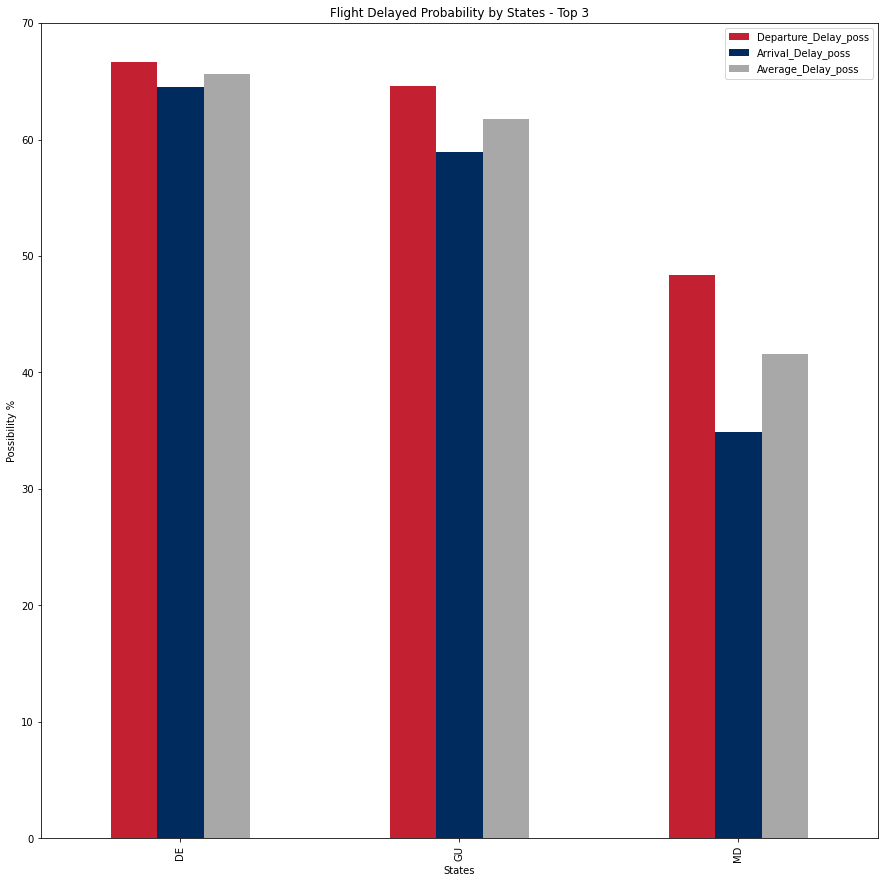

In [60]:
# Plot the delay distributions
plot_bar_df5 = pd.DataFrame({"Departure_Delay_poss":avg_num_departure_delayed_state,
                            "Arrival_Delay_poss":avg_num_arrival_delayed_state})

plot_bar_df5['Average_Delay_poss'] = (plot_bar_df5['Departure_Delay_poss']+plot_bar_df5['Arrival_Delay_poss'])/2
plot_bar_df5.sort_values(ascending=False,inplace=True,by=['Average_Delay_poss'])

plot_bar_df5 = plot_bar_df5[0:3]

figure, james = plt.subplots()

plot_bar_df5.plot.bar(ax = james, color = ["#C32032","#002B5E","#A8A8A8"])
james.set_ylabel("Possibility %")
james.set_title("Flight Delayed Probability by States - Top 3")
james.set_xlabel("States")
figure.set_size_inches(15,15)

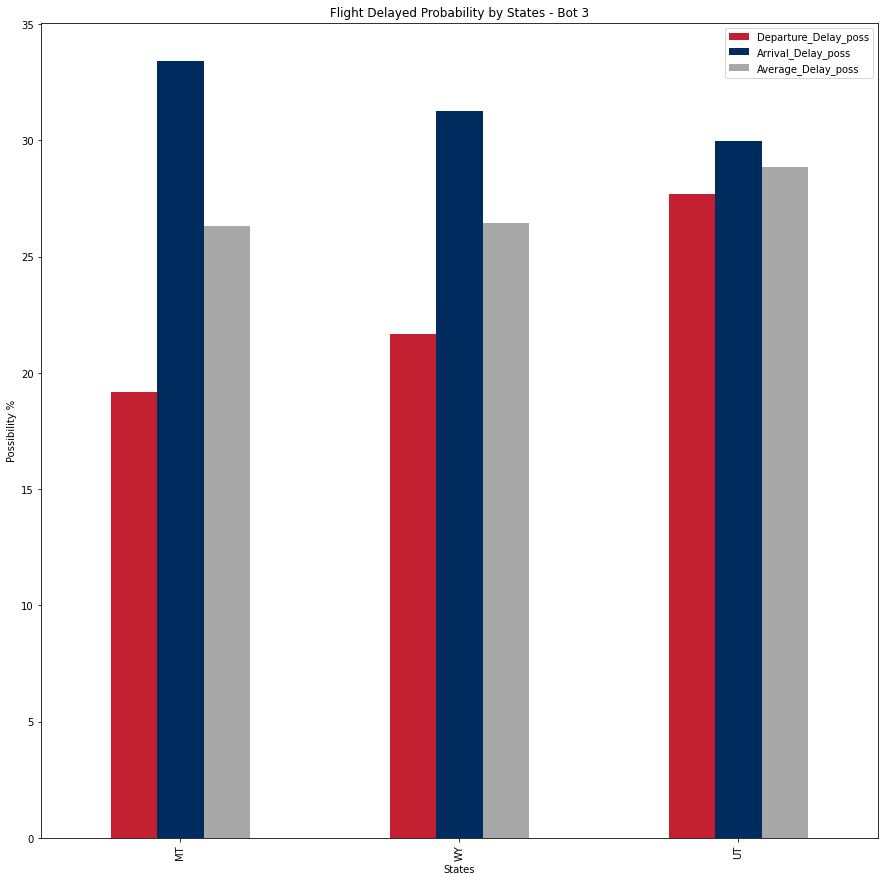

In [61]:
# Plot the delay distributions
plot_bar_df5 = pd.DataFrame({"Departure_Delay_poss":avg_num_departure_delayed_state,
                            "Arrival_Delay_poss":avg_num_arrival_delayed_state})

plot_bar_df5['Average_Delay_poss'] = (plot_bar_df5['Departure_Delay_poss']+plot_bar_df5['Arrival_Delay_poss'])/2
plot_bar_df5.sort_values(ascending=True,inplace=True,by=['Average_Delay_poss'])

plot_bar_df5 = plot_bar_df5[0:3]

figure, james = plt.subplots()

plot_bar_df5.plot.bar(ax = james, color = ["#C32032","#002B5E","#A8A8A8"])
james.set_ylabel("Possibility %")
james.set_title("Flight Delayed Probability by States - Bot 3")
james.set_xlabel("States")
figure.set_size_inches(15,15)

In [62]:
# Look for possible reason why are the small states again...
flights_merged.groupby(['ORIGIN_STATE']).sum()['DEPARTURE_DELAYED'].sort_values(ascending=False)

ORIGIN_STATE
TX    51658.0
CA    50264.0
IL    33392.0
FL    31592.0
GA    26861.0
CO    18922.0
NY    17342.0
AZ    12989.0
NV    12262.0
NC    10508.0
VA     9451.0
NJ     9333.0
WA     8789.0
MI     8560.0
MD     8253.0
MA     7950.0
MN     7331.0
PA     6934.0
MO     6785.0
UT     5542.0
HI     5283.0
TN     5065.0
OH     4556.0
LA     4234.0
OR     3240.0
WI     2761.0
IN     2349.0
KY     2181.0
OK     2000.0
AK     1944.0
PR     1935.0
SC     1687.0
AL     1563.0
NM     1557.0
AR     1352.0
CT     1276.0
NE     1163.0
IA      981.0
ID      854.0
ND      796.0
RI      754.0
MS      686.0
KS      627.0
MT      579.0
SD      541.0
NH      388.0
VI      385.0
WY      352.0
ME      283.0
WV      195.0
VT      172.0
GU       51.0
AS       11.0
DE       10.0
Name: DEPARTURE_DELAYED, dtype: float64

In [63]:
flights_merged.groupby(['ORIGIN_STATE']).count()['DEPARTURE_DELAYED'].sort_values(ascending=False)

ORIGIN_STATE
CA    129561
TX    126148
FL     83575
IL     76419
GA     71855
NY     49043
CO     43084
AZ     33018
NC     29390
NV     29246
VA     27743
MI     27254
WA     24704
MN     23826
MA     21937
NJ     21621
PA     20011
UT     20003
MO     18615
HI     18214
MD     17076
TN     15072
OH     14947
LA     13146
OR     11257
WI     10283
IN      7912
KY      7425
AK      6762
OK      6437
SC      5742
PR      5356
AL      5339
NM      4630
AR      4497
NE      3987
CT      3817
IA      3473
ND      3399
ID      3314
MT      3016
MS      2693
RI      2178
KS      2168
SD      1858
WY      1625
NH      1249
VI      1088
ME      1056
VT       585
WV       486
GU        79
AS        21
DE        15
Name: DEPARTURE_DELAYED, dtype: int64

#### Interpretation
Even when looking at probability, the top and bottom three states don't change much. The reason would be similar as what we discovered in the research. Due to the extreme low volume of commercial flights (15) and high protion of delayed flights (10 flights), it would actually hard for other airports to beat such high probability of delaying. 

### Question 8
**Taxi time in the flight is most frustrating experience to me. Can you let me know which airports I should avoid and which ones I should prefer? Answer this based on average taxi time (both taxi in and taxi out).**

### Description

When it comes to specific airport, it would be obvious that larger airports would tend to have longer taxi time. Due to the difficulty of managing larger area and busier air traffic, the taxi time (both in and out) would be longer for compare to smaller airports. But it would be interesting to see which airport does the worst job among these bigger airports. Usually the duration of taxi time reflect the ability of air trafic control and we know some airports in the U.S. are not very good at doing their jobs. Top candidate would be ORD, LAX, JFK and some notable candidates. 

#### Code

In [64]:
flights['TOTAL_TAXI'] = flights['TAXI_IN'] + flights['TAXI_OUT']

flights_by_origin = flights.groupby(['ORIGIN_AIRPORT']).mean()

In [65]:
flights[flights['ORIGIN_AIRPORT']=='11292']

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,Delayed,TOTAL_TAXI
13,2015,10,25,7,F9,137,11292,14747,756,749.0,...,1024,934.0,7.0,949,941.0,-8.0,0,0,False,17.0
490,2015,10,16,5,UA,1856,11292,12892,1527,1543.0,...,862,1647.0,14.0,1657,1701.0,4.0,0,0,True,26.0
519,2015,10,8,4,WN,1025,11292,11259,1635,1636.0,...,651,1916.0,4.0,1925,1920.0,-5.0,0,0,True,14.0
681,2015,10,18,7,NK,832,11292,12266,605,NaN,...,862,NaN,NaN,925,NaN,NaN,0,1,False,NaN
933,2015,10,20,2,WN,1570,11292,12953,1735,1741.0,...,1620,2314.0,7.0,2325,2321.0,-4.0,0,0,True,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162430,2015,10,23,5,OO,5616,11292,12389,1005,955.0,...,576,1250.0,5.0,1257,1255.0,-2.0,0,0,False,36.0
1162544,2015,10,19,1,F9,757,11292,14107,2005,2005.0,...,602,2047.0,6.0,2055,2053.0,-2.0,0,0,False,19.0
1162674,2015,10,2,5,WN,3215,11292,12889,1815,1928.0,...,628,2011.0,6.0,1910,2017.0,67.0,0,0,True,21.0
1162683,2015,10,26,1,UA,735,11292,14771,1510,1533.0,...,967,1655.0,5.0,1657,1700.0,3.0,0,0,True,18.0


In [66]:
worst_airport = flights_by_origin['TOTAL_TAXI'].idxmax()
best_airport = flights_by_origin['TOTAL_TAXI'].idxmin()

print(worst_airport)
print(best_airport)

12953
15991


#### Interpretation
While it was easy to find which airport has the maximum and which airport has the minimum taxi time, the result is not very satisfying. It returns two numbers. Usually, an airport can be identified with 3 letters according to IATA airport code. It is also impossible this number can be recognized by other location identifiers that are used in the U.S. such as the FAA code or ICAO code. Therefore, to extract useful information, it is necessary to do some data cleansing before moving on.

In [67]:
flights_cleaned_airport = flights.copy()
dropping_airport = []

for i in range(len(flights_cleaned_airport)):
    if len(flights_cleaned_airport['ORIGIN_AIRPORT'][i]) > 3 and len(flights_cleaned_airport['DESTINATION_AIRPORT'][i]) > 3:
        dropping_airport.append(i)
        
flights_cleaned_airport.drop(dropping_airport,inplace = True)

In [68]:
flights_by_origin = flights_cleaned_airport.groupby(['ORIGIN_AIRPORT']).mean()

In [69]:
worst_airport = flights_by_origin['TOTAL_TAXI'].idxmax()
best_airport = flights_by_origin['TOTAL_TAXI'].idxmin()
longest_takeoff = flights_by_origin['TAXI_OUT'].idxmax()
shortest_takeoff = flights_by_origin['TAXI_OUT'].idxmin()
longest_landing = flights_by_origin['TAXI_IN'].idxmax()
shortest_landing = flights_by_origin['TAXI_IN'].idxmin()

print(worst_airport)
print(longest_takeoff)
print(longest_landing)
print(best_airport)
print(shortest_takeoff)
print(shortest_landing)

LGA
JFK
SUX
DLG
DLG
AKN


#### Interpretation
After cleaning the data, we can clearly see which airports people should avoid and which give the fastest experiences during the taxiing phase. According to our result, people should avoid LGA since on average it has the longest total taxi time compare to other cities. Dillingham Airport is public airport located in Alaska. This is the airport that gives the swiftest experience for passengers. However, according to structure of the data, this is misleading as Taxi In time relates to the arrival airport and taxi out to the departure airport therefore making it difficult to match total taxi time to airports.

In [70]:
flights_by_origin['TAXI_OUT']

ORIGIN_AIRPORT
ABE    12.878850
ABI     9.131034
ABQ    11.980377
ABR    16.228188
ABY    11.818182
         ...    
WRG     7.046875
WYS    11.477273
XNA    14.833145
YAK     7.493243
YUM    14.626016
Name: TAXI_OUT, Length: 322, dtype: float64

In [71]:
flights_by_dest = flights_cleaned_airport.groupby(['DESTINATION_AIRPORT']).mean()
flights_by_dest['TAXI_IN']

DESTINATION_AIRPORT
ABE    3.856808
ABI    3.961009
ABQ    5.534222
ABR    4.625850
ABY    3.514124
         ...   
WRG    3.627586
WYS    4.948718
XNA    5.042129
YAK    3.811594
YUM    4.477778
Name: TAXI_IN, Length: 322, dtype: float64

In [72]:
airport_taxi_df = pd.DataFrame({"Taxi_Out":flights_by_origin['TAXI_OUT'],
                               "Taxi_In":flights_by_dest['TAXI_IN'] })
airport_taxi_df['Total_Taxi'] = airport_taxi_df['Taxi_In'] + airport_taxi_df['Taxi_Out']

In [73]:
airport_taxi_df['Total_Taxi'].sort_values().head(20)

VEL     8.625541
DLG     9.050000
AKN     9.271429
CNY     9.458412
ADQ    10.280954
WRG    10.674461
BET    10.869425
OME    10.879902
SCC    11.126960
YAK    11.304837
BRW    11.426354
OTZ    11.657905
CDV    11.792676
TXK    12.448385
SJT    12.521980
ACT    12.683682
EYW    12.744634
HRL    12.762382
PSG    12.878571
LAW    13.002856
Name: Total_Taxi, dtype: float64

In [74]:
airport_taxi_df['Total_Taxi'].sort_values(ascending=False).head(20)

JFK    35.702368
LGA    35.478803
ORD    32.774920
EWR    29.912066
CLT    29.337697
DFW    28.783040
LAX    28.695161
PHL    28.333801
MIA    27.535071
BOS    27.081675
IAH    27.049765
ISN    26.735994
ATL    26.172572
DTW    26.042667
COS    25.880036
ITH    24.809524
SEA    24.763803
SFO    24.574973
DCA    24.568961
DEN    24.350329
Name: Total_Taxi, dtype: float64

#### Interpretation
After doing some further analysis we finally can extract the airports and the respective taxi times we have been looking for.
The airports with the lowest total taxi times are at Vernal Regional Airport in Utah (VEL), Dillingham Airport in Alaska (DLG) and King Salmon Airport in Alaska (AKN).
The highest total taxi in times are at John F. Kennedy International in New York (JFK), LaGuardia Airport in New York (LGA) and O’Hare International Airport in Illinois (ORD).
We see a clear trend between large and small airports being slower and quicker in aircraft turn over respectively.

In [75]:
airport_taxi_df['Taxi_In'].sort_values().head(20)

VEL    2.261905
TOL    2.592593
EWN    2.759615
CNY    2.897436
GTR    2.983696
EYW    3.007792
OAJ    3.024490
CSG    3.052381
BUR    3.093902
SJT    3.147766
ADQ    3.172043
AKN    3.200000
MGM    3.264798
HRL    3.271044
MHK    3.288401
BQK    3.327485
AEX    3.361371
TXK    3.364641
LAW    3.394161
LSE    3.407643
Name: Taxi_In, dtype: float64

In [76]:
airport_taxi_df['Taxi_In'].sort_values(ascending=False).head(20)

ORD    13.199539
LAX    11.779656
DFW    11.591487
EWR     9.762722
CLT     9.626966
IAH     9.171258
MIA     9.158878
LGA     8.914410
ATL     8.780654
JFK     8.740894
DEN     8.419534
TTN     8.309717
MCO     7.987758
SEA     7.979406
DTW     7.788203
MDW     7.597796
ILG     7.433333
LAS     7.366558
PHX     7.274558
HNL     7.254345
Name: Taxi_In, dtype: float64

#### Interpretation
The lowest taxi in times by airport are Vernal Regional Airport in Utah (VEL), Toledo Express Airport in Ohio (TOL) and Coastal Carolina Regional Airport in North Carolina (EWN). As you can tell all of these airports are small regional airports. The lower flight rate might aid in navigating the planes quickly from and to the roll field.
The highest taxi in times are at O’Hare International Airport in Illinois (ORD), Los Angeles International Airport in California (LAX) and Dallas/ Fort Worth International Airport in Texas (DFW). We see the trends of large airports with high traffic having longer taxi in times as planes have to rotate in and out of the gates.

In [77]:
airport_taxi_df['Taxi_Out'].sort_values().head(20)

DLG    5.300000
AKN    6.071429
VEL    6.363636
CNY    6.560976
OME    6.916667
BRW    6.971264
WRG    7.046875
SCC    7.062857
BET    7.096970
ADQ    7.108911
YAK    7.493243
OTZ    7.761905
CDV    8.112676
LIH    8.484171
ITO    8.648917
PSG    8.721429
UST    8.857143
CLL    9.082547
TXK    9.083744
ACT    9.127451
Name: Taxi_Out, dtype: float64

In [78]:
airport_taxi_df['Taxi_Out'].sort_values(ascending=False).head(20)

JFK    26.961474
LGA    26.564393
PHL    21.649519
ISN    20.918489
ITH    20.666667
EWR    20.149344
BOS    19.996162
CLT    19.710731
INL    19.682243
ORD    19.575381
CIU    19.553957
COS    19.251841
BRD    19.165217
IMT    18.850394
DCA    18.821903
PLN    18.785235
RHI    18.483333
MIA    18.376194
DTW    18.254464
MOT    18.088020
Name: Taxi_Out, dtype: float64

#### Interpretation
The lowest taxi out times are at Dillingham Airport in Alaska (DLG), King Salmon Airport in Alaska (AKN) and Vernal Regional Airport in Utah (VEL). Again, we can see the trend of small airport having the shortest times due to the low air traffic.
The highest taxi out times are at John F. Kennedy International in New York (JFK), LaGuardia Airport in New York (LGA) and Philadelphia International Airport (PHL). New York stays true to having the worse airports. It would be interesting to see how this taxi time is affected by the harsh weather in the winter and if that is a main contributor to the taxi out times.

### Bonus Question - Additional Findings

### Description
One of the most interesting things to do with airlines is visualize the route. Since the airport data has included the latitude and longitude data, it would be possible to construct a route map for flights for this project. This visualization can be a good foundation for further analyses once constructed. 
We also decided to look at some of the claims from the earlier sections in more detail. Especially how season affect cancelation rates. Not only does cold weather often delay flights, but summer also creates more routes into vacation spots which in turn then can lead to a higher rate of cancelation. Exploring this notion visually makes our findings clearer to present and easier to digest for any lay person. 
#### Code

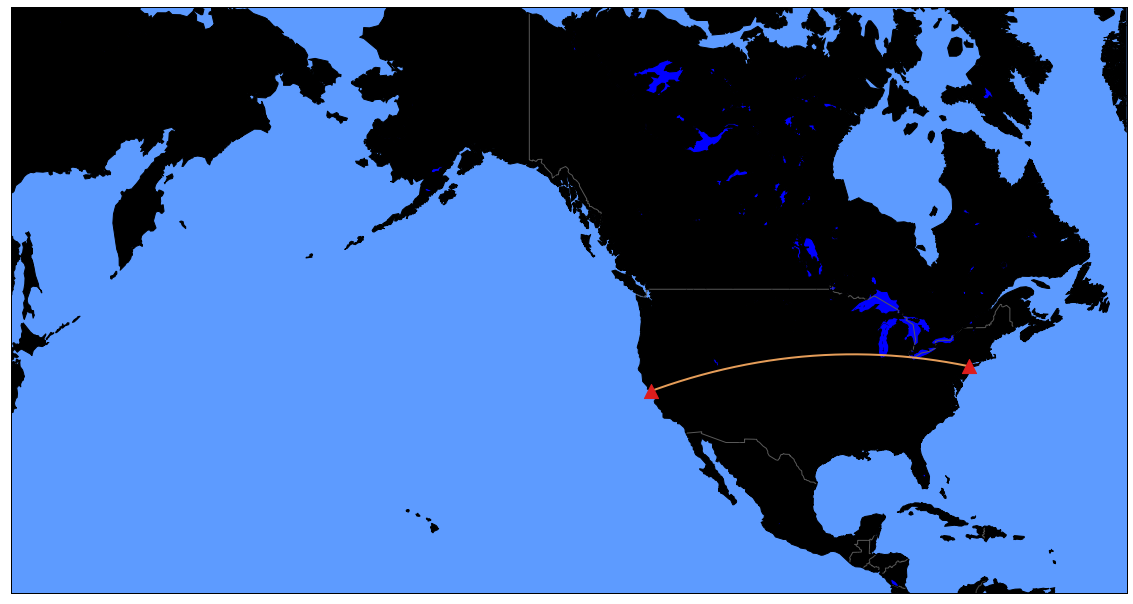

In [78]:
plt.figure(figsize=(20,20))
m = Basemap(projection='merc',llcrnrlon=-220,llcrnrlat=10,urcrnrlon=-50,
            urcrnrlat=70, lat_ts=0, resolution='l')
m.drawmapboundary(fill_color = '#5D9BFF')
m.fillcontinents(color='black',lake_color='blue')
m.drawcountries(color='#585858',linewidth=1)
m.drawstates(linewidth = 0.2)
m.drawcoastlines()
Points = {"New York":(40.7,-74),"San Francisco":(37.8,-122.4)}
Lon = [Points[key][0] for key in Points]
Lat = [Points[key][1] for key in Points]
X, Y = m(Lat,Lon)
m.scatter(X,Y,zorder=5,s=200,color="#DE1D1D",marker="^")
x, y = m.gcpoints(Lat[0],Lon[0],Lat[1],Lon[1],500)
plt.plot(x,y,color="#E59D59",linewidth=2)
plt.show()

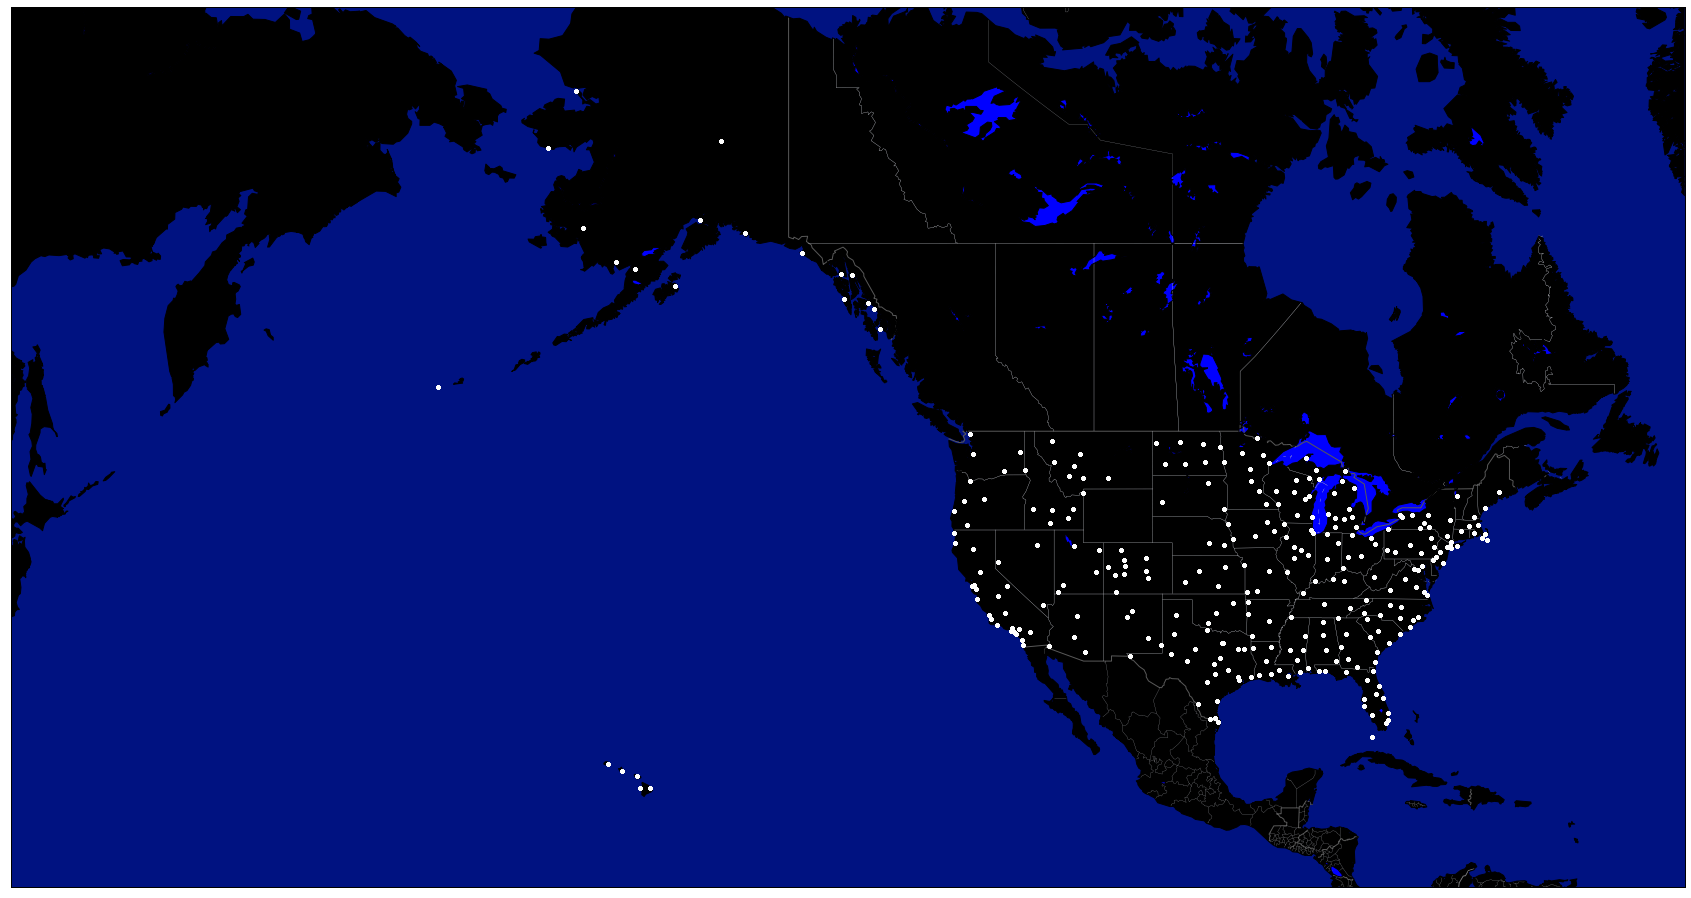

In [79]:
# Plot how airports are distributed throughout the U.S.
plt.figure(figsize = (30,20))
color_set = ['white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white','white']
m = Basemap(projection='merc',llcrnrlon=-220,llcrnrlat=10,urcrnrlon=-50,
            urcrnrlat=70, lat_ts=0, resolution='l')
m.fillcontinents(color="black",lake_color="blue")
m.drawmapboundary(fill_color="#001281")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(color = "#BEC0C7",linewidth = 0.2)
m.drawcoastlines(linewidth=1)
i = 0
for state in ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WU']:
    X, Y = m(list(flights_merged[flights_merged['ORIGIN_STATE']==state]['ORIGIN_LON']),list(flights_merged[flights_merged['ORIGIN_STATE']==state]['ORIGIN_LAT']))
    m.scatter(X, Y, color=color_set[i],s=10,zorder=2)
    i += 1
plt.show()

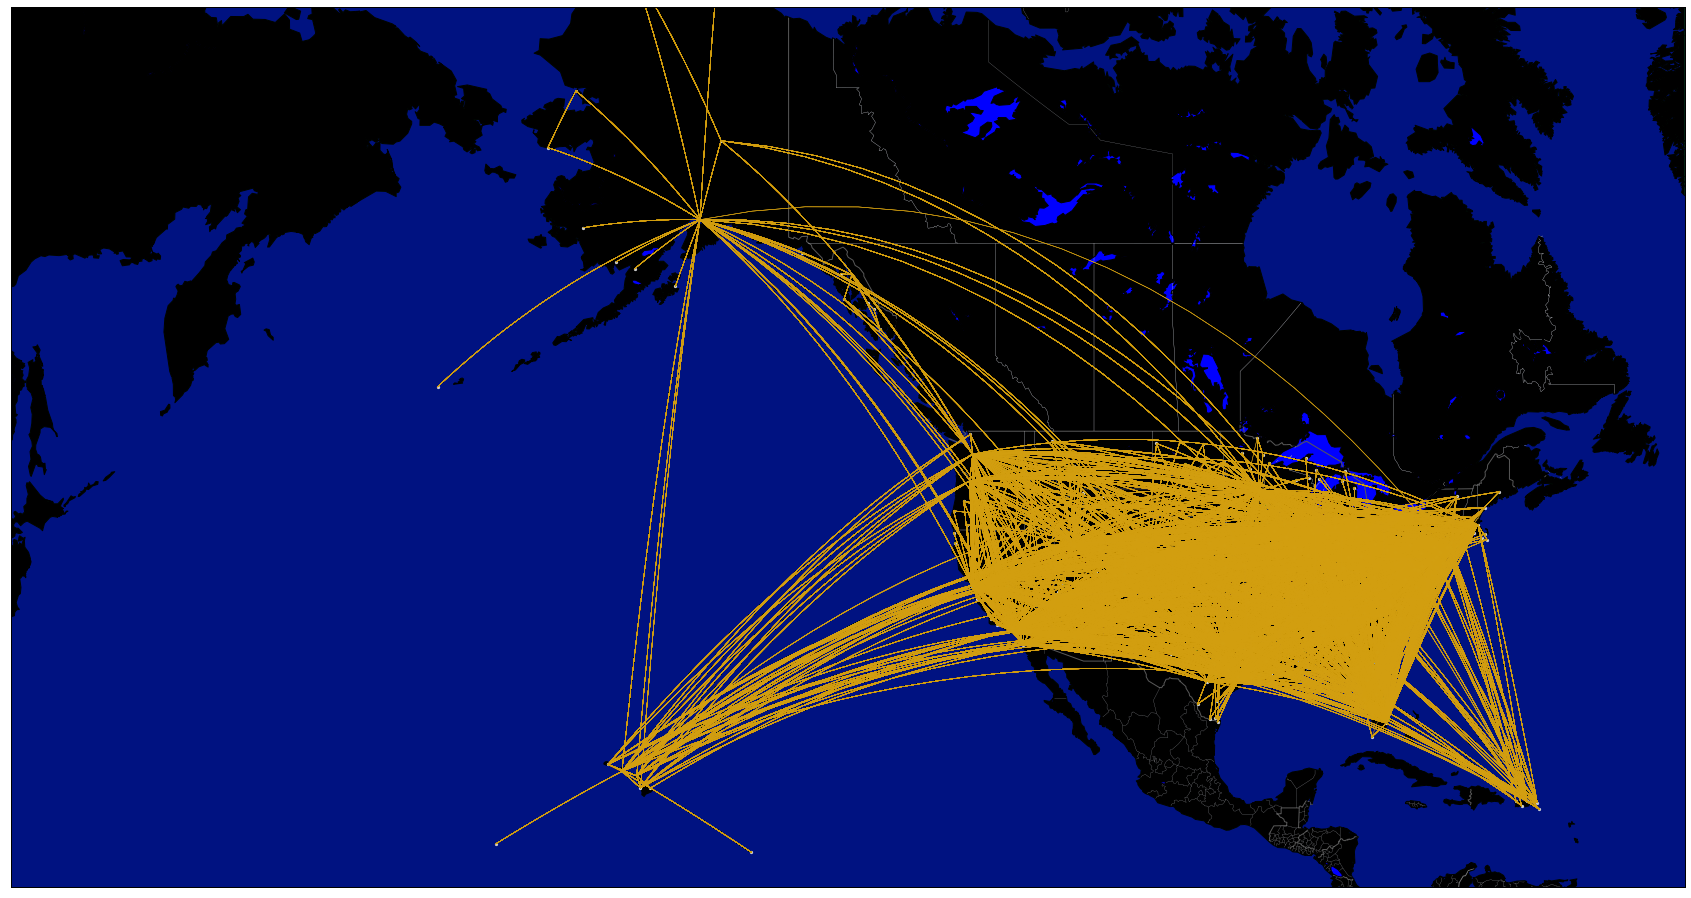

In [80]:
color_set = ["#5DADE2","#F1C40F","#E74C3C","#3D3228","#ECF0F1","#73FF5B"]
plt.figure(figsize = (30,20))
m = Basemap(projection='merc',llcrnrlon=-220,llcrnrlat=10,urcrnrlon=-50,
            urcrnrlat=70, lat_ts=0, resolution='l')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.fillcontinents(color="black",lake_color="blue")
m.drawmapboundary(fill_color="#001281")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(color = "#BEC0C7",linewidth = 0.2)
m.drawcoastlines(linewidth=1)
x1, y1 = m(list(airports['LONGITUDE']),list(airports['LATITUDE']))
m.scatter(x1,y1,color='#CDCDCD',s=5,zorder=2)
for index, row in flights_merged.iterrows():
    x2, y2 = m.gcpoints(row["ORIGIN_LON"],row["ORIGIN_LAT"],row["DEST_LON"],row["DEST_LAT"],20)
    plt.plot(x2,y2,color="#d39F10",linewidth=0.5)
plt.show()

The visualization does not provide much information that can help passengers. The data set provides detailed information regarding but the volume might be overwheming. In order to extract useful information out of the dataset, it would be necessary to focus on a certain type of flight and a range of date. 

One thing would be interesting to look at would be the route comparison between cancelled flights and non-cancelled flights in June, when the number of cancelled flights increased significantly compare to May. 

In [81]:
# Narrow down the flights
cancelled_flights_June = flights_merged[(flights_merged['MONTH']==6)&(flights_merged['CANCELLED']==1)]
cancelled_flights_May = flights_merged[(flights_merged['MONTH']==5)&(flights_merged['CANCELLED']==1)]

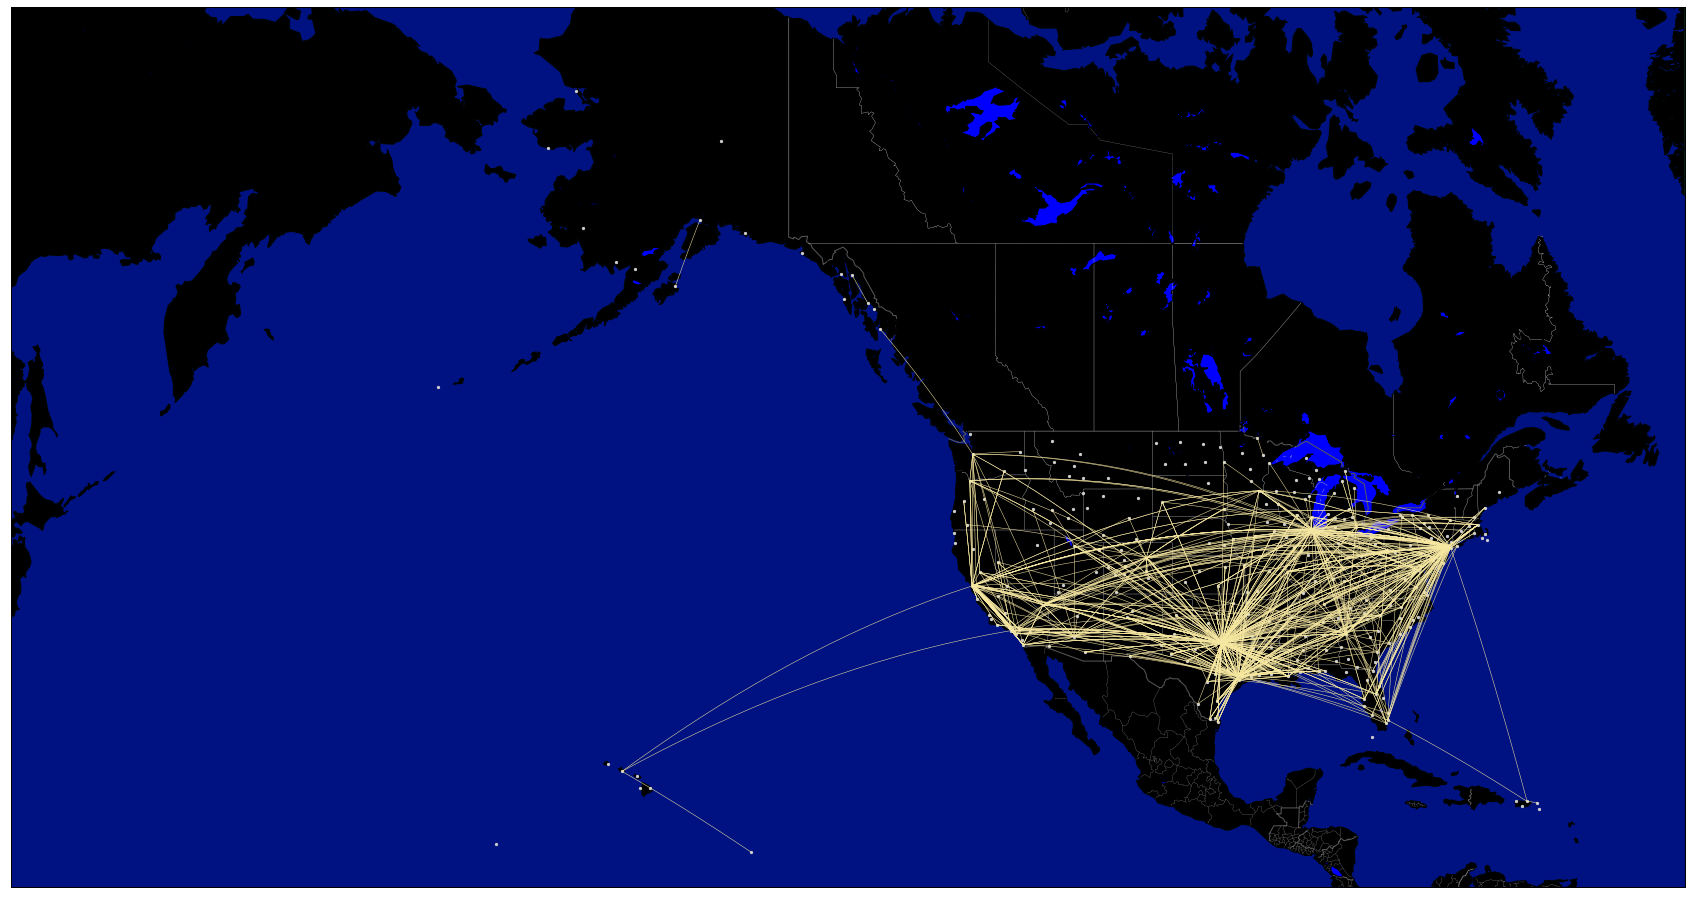

In [87]:
# Plot the May Cancelled Flight Route Map
plt.figure(figsize = (30,20))
m = Basemap(projection='merc',llcrnrlon=-220,llcrnrlat=10,urcrnrlon=-50,
            urcrnrlat=70, lat_ts=0, resolution='l')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.fillcontinents(color="black",lake_color="blue")
m.drawmapboundary(fill_color="#001281")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(color = "#BEC0C7",linewidth = 0.2)
m.drawcoastlines(linewidth=1)
x1, y1 = m(list(airports['LONGITUDE']),list(airports['LATITUDE']))
m.scatter(x1,y1,color='#CDCDCD',s=5,zorder=2)
for index, row in cancelled_flights_May.iterrows():
    x2, y2 = m.gcpoints(row["ORIGIN_LON"],row["ORIGIN_LAT"],row["DEST_LON"],row["DEST_LAT"],20)
    plt.plot(x2,y2,color="#f6e7a1",linewidth=0.5)
plt.show()

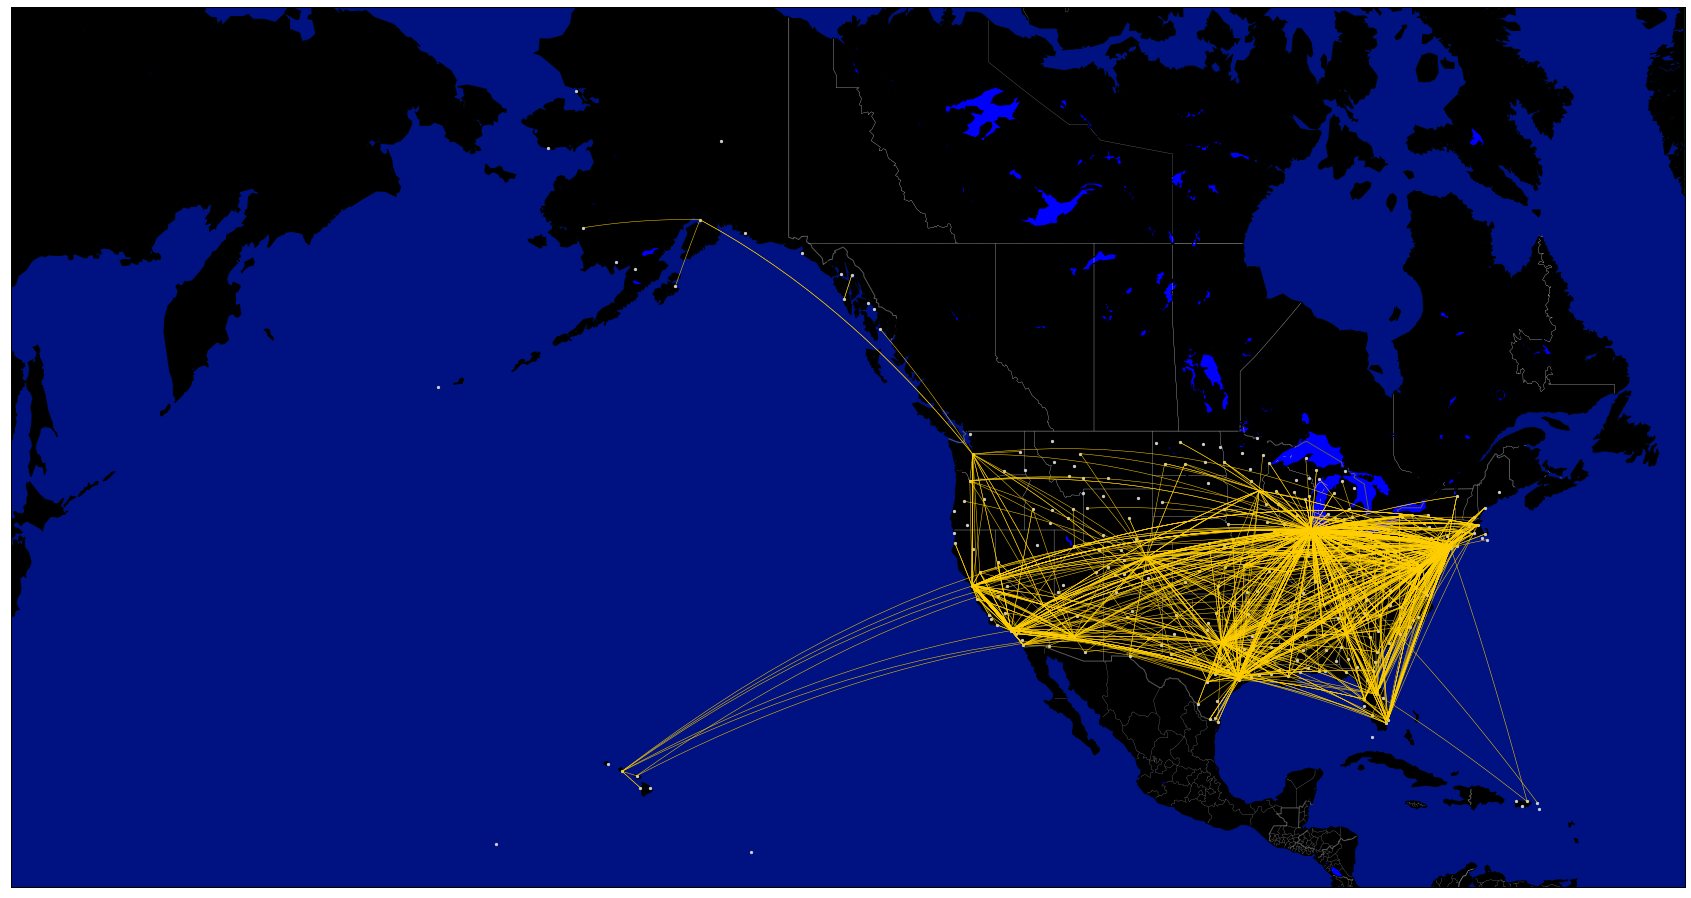

In [86]:
# Plot the June Cancelled Flight Route Map
plt.figure(figsize = (30,20))
m = Basemap(projection='merc',llcrnrlon=-220,llcrnrlat=10,urcrnrlon=-50,
            urcrnrlat=70, lat_ts=0, resolution='l')
m.fillcontinents(color="#0D9C29",lake_color="blue")
m.fillcontinents(color="black",lake_color="blue")
m.drawmapboundary(fill_color="#001281")
m.drawcountries(color='#585858',linewidth = 1)
m.drawstates(color = "#BEC0C7",linewidth = 0.2)
m.drawcoastlines(linewidth=1)
x1, y1 = m(list(airports['LONGITUDE']),list(airports['LATITUDE']))
m.scatter(x1,y1,color='#CDCDCD',s=5,zorder=2)
for index, row in cancelled_flights_June.iterrows():
    x2, y2 = m.gcpoints(row["ORIGIN_LON"],row["ORIGIN_LAT"],row["DEST_LON"],row["DEST_LAT"],20)
    plt.plot(x2,y2,color="#ffcf01",linewidth=0.5)
plt.show()

#### Interpretation
Using the longitude and latitude data of each airport we plotted the location of all airport in the dataset. Afterwards we used the arrival and departure airport of flight routes to create a route map of all flights across the US. These visuals became very crowded and cluttered not offering much insight.

Therefore, we decided to compare the flights canceled between the month of May and June. As we can see there are many more flights canceled in June, however it is important to notice that over all there are more flights canceled in June as we can see by the fight routes to Hawaii getting canceled almost tripling. As a conclusion for the next summer vacation it might be reasonable to expect delays or cancelations in those months and be prepared to fall back on a Plan B.